In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from matplotlib import cm
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set_theme()
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

from statannot import add_stat_annotation
plt.rcParams["font.family"] = "Times New Roman"

In [13]:
Ns = [1, 2, 4, 8]
Js = list(range(1, 7))
cif_names = ["7mhf", "7mhg", "7mhh", "7mhi", "7mhj", "7mhk"]
cif_names.reverse()

summary_file = Path(Path.home(), "Documents/xray/sample_bench/data/7mhf/166_N1/summary_ref_15.csv")
summary_df = pd.read_csv(summary_file, index_col=0)
summary_df.head()

,index,job_id,cif_name,w_0,pdb,r_free,ff,N,J,w_1,w_2,w_3,w_4,w_5,w_6,w_7,delta,job_cif_str
508,508,5,7mhk,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.293053,88.835005,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046053,7mhk
3300,3300,19,7mhk,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.274136,714.633937,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027136,"7mhi,7mhk"
8053,8055,35,7mhk,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.263804,7544.013477,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016804,"7mhg,7mhi,7mhk"
12765,12767,48,7mhk,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.262198,1532.903358,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015198,"7mhf,7mhh,7mhi,7mhk"
18083,18085,60,7mhk,1.0,/wynton/group/sali/mhancock/xray/sample_bench/...,0.267385,2278.918229,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020385,"7mhf,7mhh,7mhi,7mhj,7mhk"


7mhk
7mhk 1 1
7mhk 2 1
7mhk 4 1
7mhk 8 1
7mhj
7mhj 1 1
7mhj 2 1
7mhj 4 1
7mhj 8 1
7mhi
7mhi 1 1
7mhi 2 1
7mhi 4 1
7mhi 8 1
7mhh
7mhh 1 1
7mhh 2 1
7mhh 4 1
7mhh 8 1
7mhg
7mhg 1 1
7mhg 2 1
7mhg 4 1
7mhg 8 1
7mhf
7mhf 1 1
7mhf 2 1
7mhf 4 1
7mhf 8 1


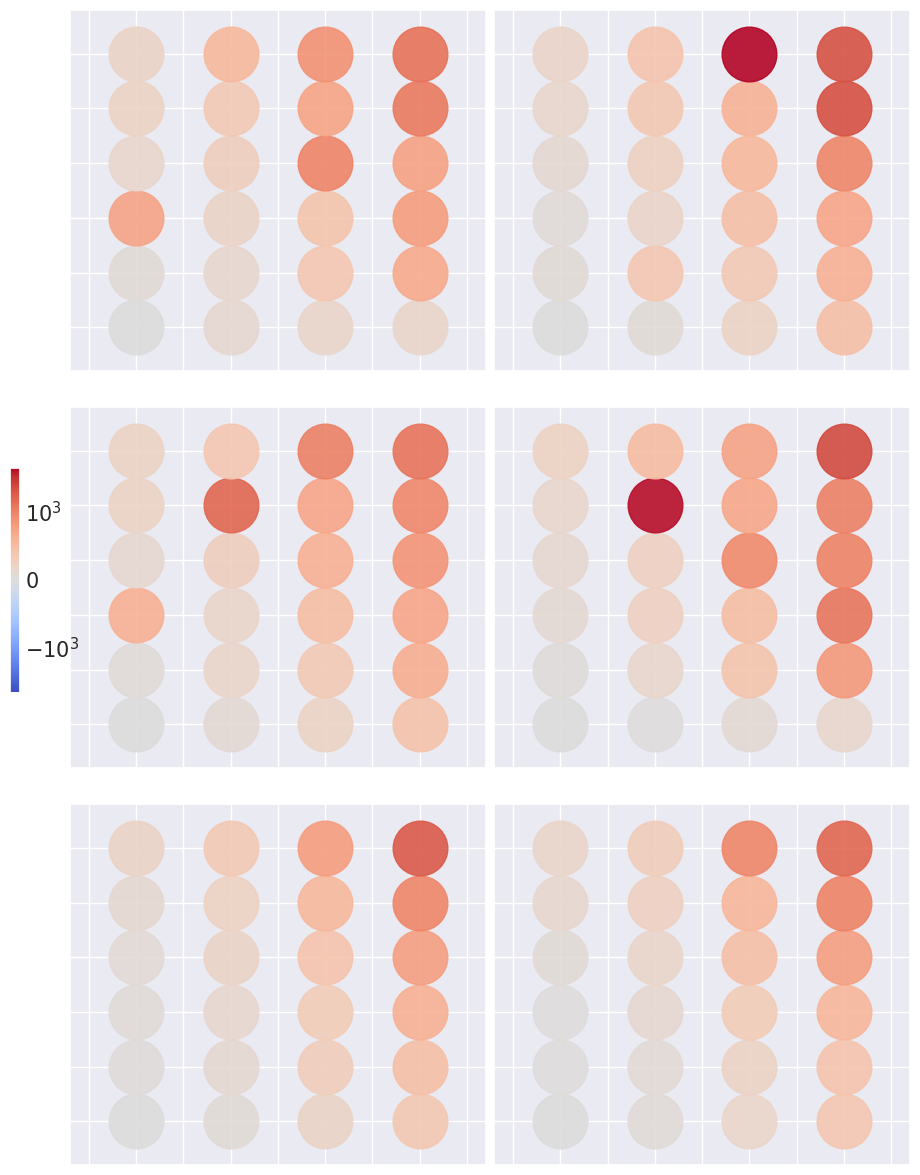

In [18]:
cmap = "coolwarm"

fig_adjust = 0.06

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
fig.subplots_adjust(left=fig_adjust)  # Adjust subplots to make room for the colorbar

delta_r_free_arr = np.ndarray(shape=(6, 4, 6))
J_min_arr = np.ndarray(shape=(6, 4))

for i in range(len(cif_names)):
    cif_name = cif_names[i]
    print(cif_name)

    # Should it be relative to the N=1, J=1 R free or the pdb r free?
    N1_J1_r_free = summary_df[(summary_df["N"] == 1) & (summary_df["J"] == 1) & (summary_df["cif_name"] == cif_name)]["ff"].values[0]

    for x in range(len(Ns)):
        deltas = list()

        N = Ns[x]
        for y in range(6):
            J = y+1

            best_r_free = summary_df[(summary_df["N"] == N) & (summary_df["J"] == J) & (summary_df["cif_name"] == cif_name)]["ff"].values[0]
            delta = best_r_free - N1_J1_r_free
            delta_r_free_arr[i, x, y] = delta

            deltas.append(delta)

            # print(cif_name, N, J, delta)
        J_min = deltas.index(min(deltas))+1
        J_min_arr[i, x] = J_min
        print(cif_name, N, J_min)

# NORMALIZE COLORBAR
delta_min, delta_max = delta_r_free_arr.min(), delta_r_free_arr.max()
delta_min = -delta_max
# print(delta_min, delta_max)
norm = Normalize(vmin=-delta_max, vmax=delta_max)

for i in range(6):
    ax = axs[i//2][i%2]
    for x in range(len(Ns)):
        N = Ns[x]
        for y in range(len(cif_names)):
            J = y+1
            ax.scatter(x, J, s=1550, c=delta_r_free_arr[i, x, y], cmap=cmap, norm=norm, alpha=0.9)

    ax.scatter(-.5, .5, s=0)
    ax.scatter(3.5, 6.5, s=0)

    # if i == 0:
    #     ax.locator_params(axis='y', nbins=7)
    #     ylabels = [item.get_text() for item in ax.get_yticklabels()]
    #     ylabels = ['', '1', '2', '3', '4', '5', 'J=6', '']
    #     ax.set_yticklabels(ylabels)
    #     ax.tick_params(axis='y', labelsize=40)
    # else:
    ax.tick_params(left=False, labelleft=False)

    # if i == 4:
    #     ax.locator_params(axis='x', nbins=5)
    #     xlabels = [item.get_text() for item in ax.get_xticklabels()]
    #     xlabels = ['', 'N=1', '2', '4', '8', '']
    #     ax.set_xticklabels(xlabels)
    #     ax.tick_params(axis='x', labelsize=40)
    # else:
    ax.tick_params(bottom=False, labelbottom=False)

## COLORBAR
h, w = .15, .01
cbar_ax = fig.add_axes([0, (1-h)/2, w, h])
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # You have to set an array for the ScalarMappable
cbar = plt.colorbar(sm, cax=cbar_ax, label=None, fraction=.01, pad=0)
cbar.ax.tick_params(labelsize=15, size=0)
new_ticks = [-delta_max+.01, 0, delta_max-.01] # For 5 ticks
cbar.set_ticks([-10000, 0, 10000])
cbar.set_ticklabels(["$-10^3$", "$0$", "$10^3$"])

#     plt.xlabel(None)
#     plt.ylabel(None)

plt.subplots_adjust(wspace=0.02, hspace=0.1)
# plt.tight_layout()
plt.savefig(Path(Path.home(), "Desktop/fig.png"))

